In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics, model_selection, linear_model, tree, ensemble, neighbors
import pickle

%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Preprocessing Data

#### Train Data

In [2]:
# read the train data
train_df = pd.read_csv('train.tsv',sep='\t')
train_df.head()

,is_virus,filename,libs
0,1,VirusShare_44a578f74f71c566b2ea3702a581bf0d,kernel32.dll
1,1,VirusShare_852c5ccb274e5cac09cbaa0bf6ee9d76,"kernel32.dll,advapi32.dll,comctl32.dll,comdlg3..."
2,1,VirusShare_d7e9e47398dd04225d21fa3afc3acc5a,"msvcrt.dll,kernel32.dll,user32.dll,advapi32.dl..."
3,1,VirusShare_04dee410f3aef6ff2fbbf58cc6a38fbf,"kernel32.dll,user32.dll,gdi32.dll,advapi32.dll..."
4,1,VirusShare_04ce876f84647d16e6ef35a6deae629f,"kernel32.dll,advapi32.dll,msvcrt.dll,user32.dl..."


In [3]:
train_df.shape

(16290, 3)

In [4]:
# general data information 
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16290 entries, 0 to 16289
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   is_virus  16290 non-null  int64 
 1   filename  16290 non-null  object
 2   libs      16290 non-null  object
dtypes: int64(1), object(2)
memory usage: 381.9+ KB


In [5]:
# check for data gaps
train_df.isnull().values.any()

False

In [6]:
# convert text train data to a matrix of token counts
libs = train_df.libs
vectorizer = CountVectorizer(tokenizer = lambda x: x.split(','))
V = vectorizer.fit_transform(libs)

# split the data into train subsets
X_train = V.toarray()
y_train = train_df['is_virus'].to_numpy()

#### Validation Data

In [7]:
# read the validation data
val_df = pd.read_csv('train.tsv',sep='\t')
val_df.head()

,is_virus,filename,libs
0,1,VirusShare_44a578f74f71c566b2ea3702a581bf0d,kernel32.dll
1,1,VirusShare_852c5ccb274e5cac09cbaa0bf6ee9d76,"kernel32.dll,advapi32.dll,comctl32.dll,comdlg3..."
2,1,VirusShare_d7e9e47398dd04225d21fa3afc3acc5a,"msvcrt.dll,kernel32.dll,user32.dll,advapi32.dl..."
3,1,VirusShare_04dee410f3aef6ff2fbbf58cc6a38fbf,"kernel32.dll,user32.dll,gdi32.dll,advapi32.dll..."
4,1,VirusShare_04ce876f84647d16e6ef35a6deae629f,"kernel32.dll,advapi32.dll,msvcrt.dll,user32.dl..."


In [8]:
val_df.shape

(16290, 3)

In [9]:
# general data information 
val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16290 entries, 0 to 16289
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   is_virus  16290 non-null  int64 
 1   filename  16290 non-null  object
 2   libs      16290 non-null  object
dtypes: int64(1), object(2)
memory usage: 381.9+ KB


In [10]:
# check for data gaps
val_df.isnull().values.any()

False

In [11]:
# convert text validation data to a matrix of token counts
libs = val_df.libs
V = vectorizer.transform(libs)

# split the data into validation subsets
X_val = V.toarray()
y_val = val_df['is_virus'].to_numpy()

#### Test Data

In [12]:
# read test data
test_df = pd.read_csv('test.tsv',sep='\t')
test_df.head()

,libs
0,"user32.dll,kernel32.dll"
1,"cygwin1.dll,cygiconv-2.dll,cygintl-8.dll,cygz...."
2,"winmm.dll,tapi32.dll,ws2_32.dll,setupapi.dll,v..."
3,kernel32.dll
4,kernel32.dll


In [13]:
# convert text test data to a matrix of token counts
libs = test_df.libs

# select test subset
V = vectorizer.transform(libs)
X_test = V.toarray()

### Exploratory data analysis

Train data
Class 1: 66.7%
Class 0: 33.3%

Validation data
Class 1: 66.7%
Class 0: 33.3%


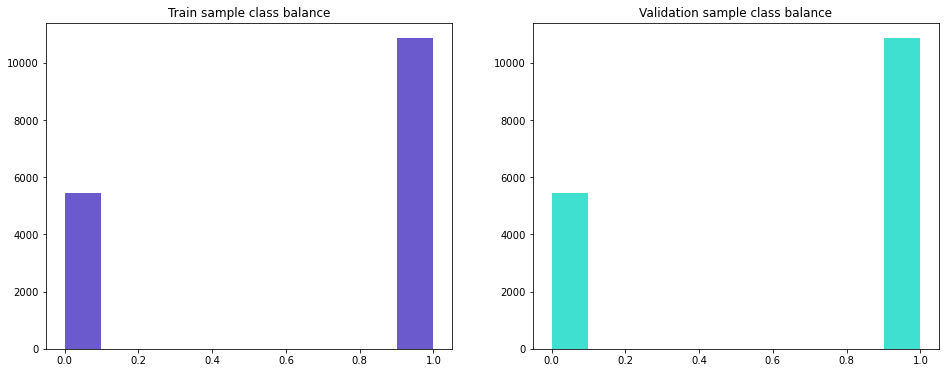

In [14]:
# check the class balance
plt.figure(figsize = (16, 6))
plt.subplot(121)
pylab.hist(y_train, color = 'slateblue')
pylab.title('Train sample class balance')
plt.subplot(122)
pylab.hist(y_val, color = 'turquoise')
pylab.title('Validation sample class balance')

print('Train data')
print('Class 1: {:.1%}'.format(len(y_train[y_train==1])/len(y_train)))
print('Class 0: {:.1%}'.format(len(y_train[y_train==0])/len(y_train)))
print()

print('Validation data')
print('Class 1: {:.1%}'.format(len(y_val[y_val==1])/len(y_val)))
print('Class 0: {:.1%}'.format(len(y_val[y_val==0])/len(y_val)))

### Model Building

In [15]:
# the function accepts an array of classifiers as input
# returns an array of class labels probability predictions 
# and an array of class labels predictions

In [16]:
classifier_1 = linear_model.LogisticRegression(max_iter=1000).fit(X_train,y_train)
classifier_2 = tree.DecisionTreeClassifier().fit(X_train,y_train)
classifier_3 = neighbors.KNeighborsClassifier().fit(X_train,y_train)
classifier_4 = linear_model.SGDClassifier(loss='log',max_iter=1000).fit(X_train,y_train)

classifiers = [classifier_1,classifier_2,classifier_3,classifier_4]
description = ['Logistic Regression Classifier','Decision Tree Classifier','KNeighbours Classifier','SGD Classifier']

### Model Performance

In [17]:
#creating validation proba prediction and prediction arrays

p_predict = []
predict = []

for classifier in classifiers:
    
    p_predicted = classifier.predict_proba(X_val)
    p_predict.append(p_predicted)
    
    predicted = classifier.predict(X_val)
    predict.append(predicted)

Text(0.5, 1.0, 'Classifiers in presicion-recall axises (validation data)')

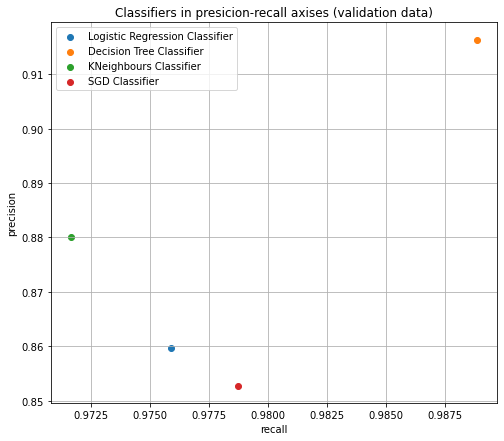

In [18]:
# calculate precision, recall and f-metric
# plot the dots in the precision-recall axises

precisions = []
recalls = []
f_scores = []

for predicted in predict:
    f_score = metrics.f1_score(y_val,predicted)
    f_scores.append(f_score)
    
    precision = metrics.precision_score(y_val, predicted)
    precisions.append(precision)
    
    recall = metrics.recall_score(y_val, predicted)
    recalls.append(recall)

plt.figure(figsize=(8,7))
pyplot.grid()
for precision,recall,descr in zip(precisions,recalls,description):
    pylab.scatter(recall, precision, label=descr)
    
plt.xlabel('recall')
plt.ylabel('precision')
plt.legend(loc='upper left')
plt.title('Classifiers in presicion-recall axises (validation data)')

Text(0.5, 1.0, 'PR curves (validation data)')

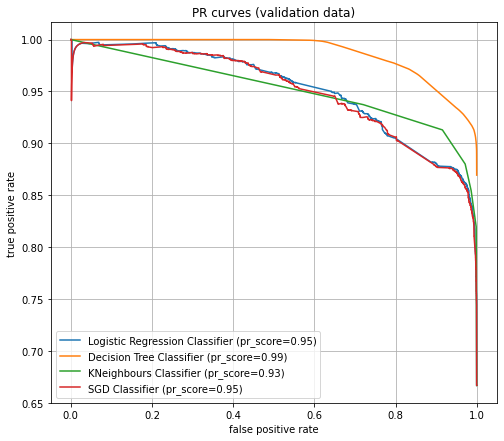

In [19]:
# plot the precision-recall curve given the classifiers and training data
# calculate pr-scores for the classifiers

plt.figure(figsize=(8,7))
pyplot.grid()

for p_predicted, descr in zip(p_predict,description):
    pr, rec, thr = metrics.precision_recall_curve(y_train, p_predicted[:,1])
    pr_score = metrics.average_precision_score(y_train, p_predicted[:,1])
    pylab.plot(rec,pr, label=descr + ' (pr_score={:.2f})'.format(pr_score))
    
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="lower left")
plt.title('PR curves (validation data)')

Text(0.5, 1.0, 'ROC curves (validation data)')

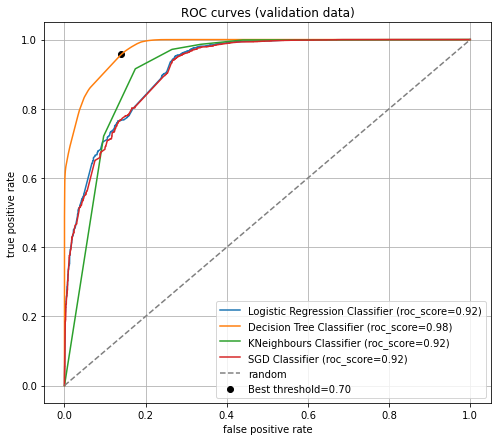

In [20]:
# plot the roc curve given the classifiers and training data
# calculate roc-scores for the classifiers

plt.figure(figsize=(8,7))
pyplot.grid()

roc_scores = []
for p_predicted,descr in zip(p_predict,description):
    fpr, tpr, thr = metrics.roc_curve(y_train, p_predicted[:,1])
    roc_score = metrics.roc_auc_score(y_train, p_predicted[:,1])
    roc_scores.append(roc_score)
    pylab.plot(fpr, tpr, label=descr + ' (roc_score={:.2f})'.format(roc_score))

    
# mark the best threshold on the best classifier plot

idx = argmax(roc_scores)
fpr, tpr, thr = metrics.roc_curve(y_train, p_predict[idx][:,1])
gmeans = sqrt(tpr * (1-fpr))
ix = argmax(gmeans)
best_thr = thr[ix]

pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black',label='Best threshold={:.2f}'.format(thr[ix]))
    
pylab.plot([0, 1], [0, 1], '--', color = 'grey', label = 'random')
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="lower right")
plt.title('ROC curves (validation data)')

In [21]:
for score, descr in zip(f_scores,description):
    print('F-score of ' + descr + ' = {:.3f}'.format(score))

F-score of Logistic Regression Classifier = 0.914
F-score of Decision Tree Classifier = 0.951
F-score of KNeighbours Classifier = 0.924
F-score of SGD Classifier = 0.911


In [22]:
# save classifier with the highest f-score as a pickle string
idx = np.argmax(f_scores)
best_classifier = classifiers[idx]
print('Best classifier is the',description[idx])
pickle.dump(best_classifier, open('Classifier.joblib', 'wb'))

Best classifier is the Decision Tree Classifier


In [23]:
# main classification metrics
print(metrics.classification_report(y_val, best_classifier.predict(X_val)))

              precision    recall  f1-score   support

           0       0.97      0.82      0.89      5430
           1       0.92      0.99      0.95     10860

    accuracy                           0.93     16290
   macro avg       0.94      0.90      0.92     16290
weighted avg       0.94      0.93      0.93     16290



In [24]:
# confusion matrix
print(metrics.confusion_matrix(y_val, best_classifier.predict(X_val)))

[[ 4450   980]
 [  121 10739]]


In [25]:
tn, fp, fn, tp = metrics.confusion_matrix(y_val, best_classifier.predict(X_val)).ravel()
accuracy = metrics.accuracy_score(y_val, best_classifier.predict(X_val))
precision = metrics.precision_score(y_val, best_classifier.predict(X_val))
recall = metrics.recall_score(y_val, best_classifier.predict(X_val))
f1 = metrics.f1_score(y_val, best_classifier.predict(X_val))

In [26]:
lines = []
lines.append('True positive: {}'.format(tp))
lines.append('False positive {}'.format(fp))
lines.append('False negative: {}'.format(fn))
lines.append('True negative: {}'.format(tn))
lines.append('Accuracy: {:.4}'.format(accuracy))
lines.append('Precision: {:.4}'.format(precision))
lines.append('Recall: {:.4}'.format(recall))
lines.append('F1: {:.4}'.format(f1))

In [27]:
with open('validation.txt','w') as file:
    file.writelines(line + '\n' for line in lines)

### Model Predictions

In [28]:
# make a prediction based on the test sample
test_prediction = best_classifier.predict(X_test)

In [30]:
# save the prediction as a file
with open ('prediction.txt','w') as file:
    file.writelines('prediction' + '\n')
    file.writelines(str(i) + '\n' for i in test_prediction)

### Explanation of Model Predictions

In [31]:
# probability prediction for test data
predict_proba = best_classifier.predict_proba(X_test)[:,1]

# an array of indexes where probability exceeds the threshold
proba_indexes = np.where(predict_proba > best_thr)

In [32]:
lines = []
for index in range(X_test.shape[0]):
    if index in proba_indexes[0]:
        line = 'virus ({:.2%} probability)'.format(predict_proba[index])
        lines.append(line)
    else:
        lines.append('')

In [33]:
# create an explanation file
with open ('explain.txt','w') as file:
    file.writelines(line + '\n' for line in lines)